Virtual Stylist - 
Project is about taking image as an input from user and using that image as an reference and recommending more similar fashion accessories to the user.

## Download some important libraries

In [3]:
!pip install pillow

In [17]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 653.6 kB/s eta 0:01:00
   ---------------------------------------- 0.2/38.8 MB 833.5 kB/s eta 0:00:47
   ---------------------------------------- 0.2/38.8 MB 833.5 kB/s eta 0:00:47
   ---------------------------------------- 0.2/38.8 MB 833.5 kB/s eta 0:00:47
   ---------------------------------------- 0.3/38.8 MB 930.9 kB/s eta 0:00:42
   ---------------------------------------- 0.3/38.8 MB 910.2 kB/s eta 0:00:43
   ---------------------------------------- 0.4/38.8 MB 946.4 kB/s eta 0:00:41
   ---------------------------------------- 0.5/38.8 MB 1.0 MB/s eta 0:00:39
    --------------------------------------- 0.6/38.8 MB 1.1 MB/s eta 0:00:36
    --------------------------------------- 0.6/38.8 MB 1.1 MB/s eta 0:00:36
    --

In [65]:
pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ----------------------- -------------- 30.7/48.7 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 610.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.0 MB 3.2 MB/s eta 0:02:01
   ---------------------------------------- 0.1/385.0 MB 1.3 MB/s eta 0:04:54
   ---------------------------------------- 0.1/385.0 MB 944.1 kB/s eta 0:06:48
   ---------------------------------------- 0.2/385.0 MB 952.6 kB/s eta 0:06:45
   ---------------------------------------- 0.2/385.0 MB 888.4 kB/s eta 0:07:14
   ---------------------------------------- 0.2/385.0 MB 838.1 kB/s eta 0:07:40
   ---------------------------------------- 0.3/385.0 MB 850.6 kB/s eta 0:07:33
   ---------------------------------------- 0.3/385.0 MB 827.2 kB/s eta 0:07:46
   ---------------------------------------- 0.3/385.0 MB 807.

## Import libraries

In [ ]:
import cv2
import numpy as np
import os 
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt
import sklearn

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
#Function to preprocessing images in folder
def loadImages(folder, img_size=(32, 32)):
    #create an empty list to store processed images
    images = [] 

    #Run a for loop to access all the jpg, png, jpeg files in the folder
    for root, dirs, files in os.walk(folder):
        for filename in files:
            
            img_path = os.path.join(root, filename)  #creates a full path the images file
            if img_path.lower().endswith(('.png', '.jpg', '.jpeg')): #to select all the files with extension - png, jpeg, jpg
                img = cv2.imread(img_path) # read image through file path
                if img is not None:
                    img = cv2.resize(img, img_size) #resize all the images. So that all the images are of equal size
                    images.append(img) #appending processed image in the list
    
    images = np.array(images, dtype='float32') #convert list to 'float32' type
    images /= 255.0  #Divide by 255. So that all the values in the list ranges between 0 to 1
    return images #return a list with the all the processed images

In [3]:
#Folder Path
folder = "C:/Users/khush/Downloads/myStylist" 

In [4]:
#Process images in the folder
images = loadImages(folder)

In [174]:
images

array([[[[0.88235295, 0.8901961 , 0.8862745 ],
         [0.8862745 , 0.8980392 , 0.8901961 ],
         [0.8784314 , 0.8862745 , 0.8862745 ],
         ...,
         [0.7490196 , 0.79607844, 0.8039216 ],
         [0.7529412 , 0.8       , 0.80784315],
         [0.7529412 , 0.7921569 , 0.8       ]],

        [[0.85882354, 0.8784314 , 0.87058824],
         [0.87058824, 0.88235295, 0.8745098 ],
         [0.8627451 , 0.88235295, 0.8784314 ],
         ...,
         [0.77254903, 0.79607844, 0.80784315],
         [0.7607843 , 0.7882353 , 0.8       ],
         [0.75686276, 0.78431374, 0.79607844]],

        [[0.8509804 , 0.87058824, 0.8666667 ],
         [0.85882354, 0.8784314 , 0.8745098 ],
         [0.85882354, 0.8784314 , 0.8745098 ],
         ...,
         [0.77254903, 0.8       , 0.8117647 ],
         [0.7647059 , 0.7921569 , 0.8039216 ],
         [0.7607843 , 0.7921569 , 0.7921569 ]],

        ...,

        [[0.9843137 , 0.9372549 , 0.84313726],
         [0.99215686, 0.92941177, 0.8509804 ]

In [177]:
#Function to show images
def plotSample(images, index):
    plt.figure(figsize = (15,2)) #Plot a new figure 
    plt.imshow(images[index]) #to display an image
    plt.axis('off') #to remove x-label and y-label

In [114]:
images.shape

(49807, 32, 32, 3)

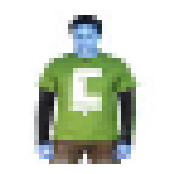

In [178]:
plotSample(images, 3000)

## WITHOUT CONVOLUTIONAL NEURAL NETWORK

In [116]:
def feature_vectors(images):
    return np.array([img.flatten() for img in images]) #Converts 3D array in 1D array

In [117]:
featureVectors = feature_vectors(images)

In [118]:
featureVectors 

array([[0.88235295, 0.8901961 , 0.8862745 , ..., 0.99215686, 0.94509804,
        0.8745098 ],
       [0.8235294 , 0.8039216 , 0.80784315, ..., 0.94509804, 0.9372549 ,
        0.9372549 ],
       [0.9019608 , 0.9019608 , 0.9019608 , ..., 0.84313726, 0.84313726,
        0.84313726],
       ...,
       [0.9137255 , 0.92156863, 0.92156863, ..., 0.92941177, 0.92941177,
        0.92941177],
       [0.99607843, 0.9607843 , 0.94509804, ..., 1.        , 1.        ,
        1.        ],
       [0.62352943, 0.49803922, 0.2901961 , ..., 0.6509804 , 0.6862745 ,
        0.6745098 ]], dtype=float32)

In [119]:
featureVectors.shape

(49807, 3072)

In [120]:
# Define a KMean Clustering Model
kmeans1 = KMeans(n_clusters=5, random_state=0).fit(featureVectors)
labels1 = kmeans.labels_ # Obtain label of every image after fitting in the model

C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [147]:
inputPath1 = input() #take user input

 C:\Users\khush\Downloads\shoes.jpg


In [170]:
# Process input image
inputImage1 = cv2.imread(inputPath1)
inputImage1 = cv2.resize(inputImage1, (32, 32))
inputImage1 = np.array(inputImage1, dtype='float32')
inputImage1 /= 255.0 

(-0.5, 31.5, 31.5, -0.5)

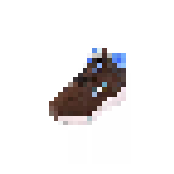

In [173]:
# INPUT IMAGE
plt.figure(figsize = (15,2))
plt.imshow(inputImage1)
plt.axis('off')

In [172]:
inputVector1 = np.array([inputImage1.flatten()]) #Converts 3D array OF INPUT IMAGE  in 1D array

In [149]:
cluster1 = kmeans1.predict(inputVector1) # Store label of input in cluster

In [151]:
cluster_images1 = [] #to store all the images belonging to same cluster as input image 
def show_images(images, labels1, cluster1):
    for i in range(len(images)):
        #if the label of the image is equal to cluster(label of input image) then append it to cluster_images
        if labels1[i] == cluster1 : 
            cluster_images1.append(images[i])

In [152]:
show_images(images,labels,cluster1)

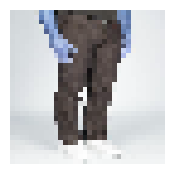

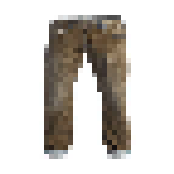

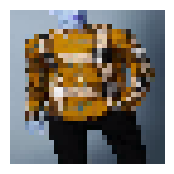

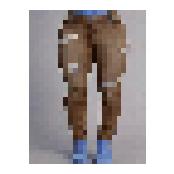

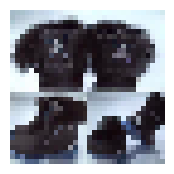

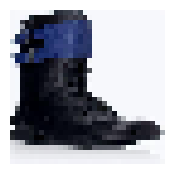

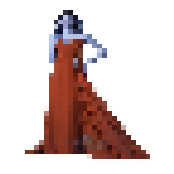

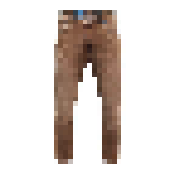

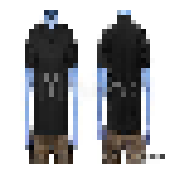

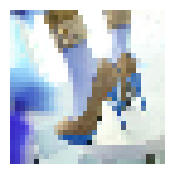

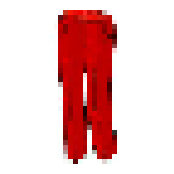

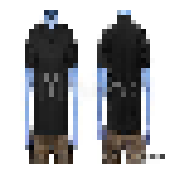

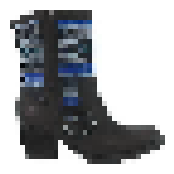

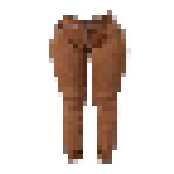

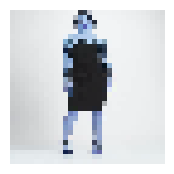

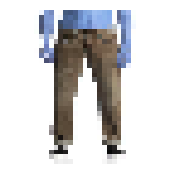

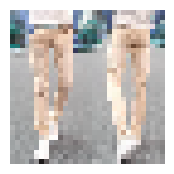

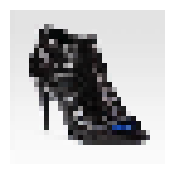

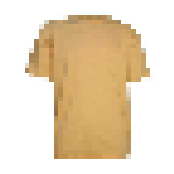

In [180]:
#show images in cluster_images1 
for i in range(19):
    plotSample(cluster_images1, i)
#if we plot 20+ images at a time then:
#WARNING
# C:\Users\khush\AppData\Local\Temp\ipykernel_21820\2206689513.py:3: RuntimeWarning: More than 20 figures have been opened. 
# Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. 
# (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
# plt.figure(figsize = (15,2)) #Plot a new figure with figure size

## WITH CONVOLUTIONAL NEURAL NETWORK

In [13]:
#Build an CNN Model to extract features of images
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu')
])

In [17]:
# This allows you to extract features from a specific layer in a pre-trained model
featureExtractor = models.Model(inputs = model.inputs, outputs = model.layers[-1].output) 

In [18]:
imageFeatures = featureExtractor.predict(images) #Extracting features of processed images

1557/1557 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step


In [19]:
reshape_imageFeatures = imageFeatures.reshape((imageFeatures.shape[0], -1)) #Flatten features array to 1D array

In [21]:
# Define a KMean Clustering Model
kmeans = KMeans(n_clusters=5, random_state=0).fit(reshape_imageFeatures)
labels = kmeans.labels_ # Obtain label of every image after fitting in the model

C:\Users\khush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [154]:
#take user input
inputPath = input() 

 C:\Users\khush\Downloads\shoes.jpg


In [155]:
# Process input image
inputImage = cv2.imread(inputPath)
inputImage = cv2.resize(inputImage, (32, 32))
inputImage = np.array(inputImage, dtype='float32')
inputImage /= 255.0 
inputImage = np.expand_dims(inputImage, axis=0)

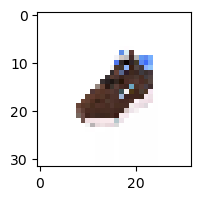

In [168]:
# INPUT IMAGE
plt.figure(figsize = (15,2))
plt.imshow(inputImage[0])

In [156]:
input_imageFeatures = featureExtractor.predict(inputImage) #Extracting features from the input image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


In [157]:
flattened_inputFeatures = input_imageFeatures.flatten().reshape(1, -1) #Flatten features array to 1D array

In [159]:
cluster = kmeans.predict(flattened_inputFeatures) # Store label of input in cluster

In [161]:
cluster_images = [] #to store all the images belonging to same cluster as input image 
def show_images(images, labels, cluster):
    for i in range(len(images)):
        #if the label of the image is equal to cluster(label of input image) then append it to cluster_images
        if labels[i] == cluster :
            cluster_images.append(images[i])

In [162]:
show_images(images,labels,cluster)

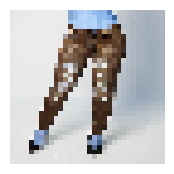

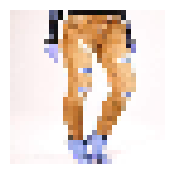

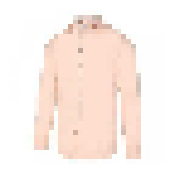

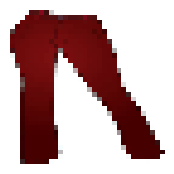

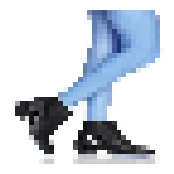

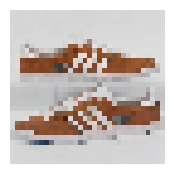

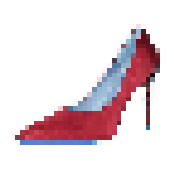

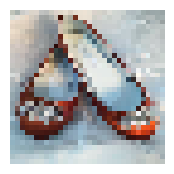

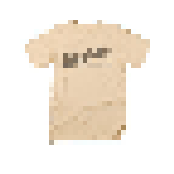

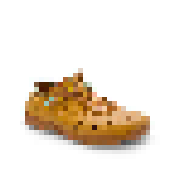

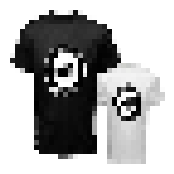

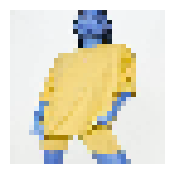

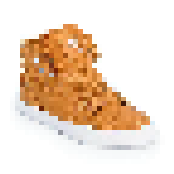

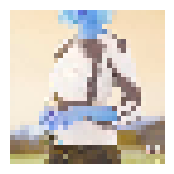

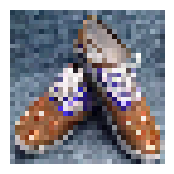

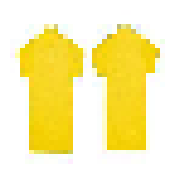

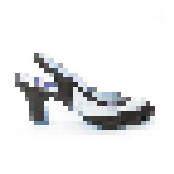

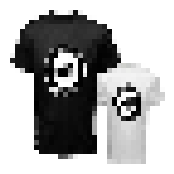

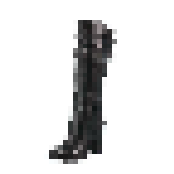

In [163]:
#show images in cluster_images1 
for i in range(1,20):
    plotSample(cluster_images, i)
#if we plot 20+ images at a time then:
#WARNING
# C:\Users\khush\AppData\Local\Temp\ipykernel_21820\2206689513.py:3: RuntimeWarning: More than 20 figures have been opened. 
# Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. 
# (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
# plt.figure(figsize = (15,2)) #Plot a new figure with figure size